# Distributions
細かい定義は置いておいて，気になった分布の性質を調べる

In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

np.random.seed(0)

## F分布

様々な自由度を持つF分布の理論分布を書いてみる

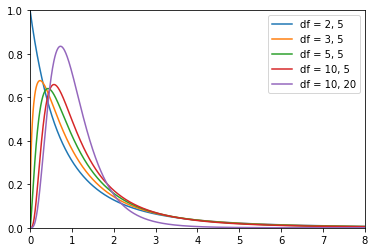

In [2]:
X = np.linspace(0.000001, 8, 1000)

dfs = ([2,5], [3,5], [5,5], [10,5], [10,20])

for df1,df2 in dfs:
    Y = stats.f.pdf(X, df1, df2)
    plt.plot(X, Y, label='df = '+str(df1)+', '+str(df2))

plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 1.0)
plt.show()

2つの正規分布N(mu1,std1), N(mu2,std2)からそれぞれn1, n2個サンプルを抽出し，
それぞれのサンプル集団から求めた不偏分散s1^2, s2^2を考える\
この時，これらの不偏分散の比は自由度df=(n1-1, n2-1)のF分布に従う\
これを確かめる

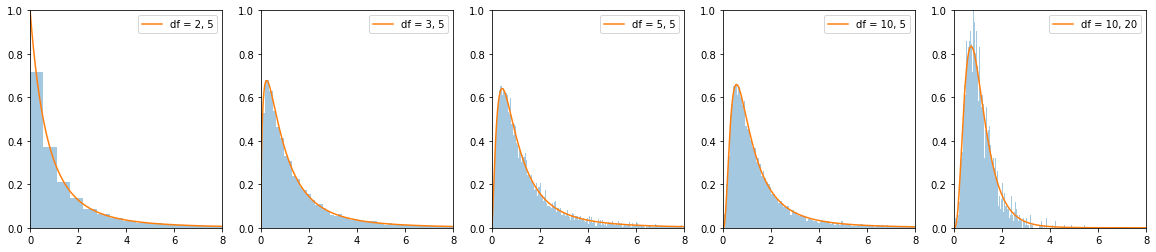

In [3]:
N = 10000
X = np.linspace(0.000001, 8, 1000) # for theoretical dist
dfs = ([2,5], [3,5], [5,5], [10,5], [10,20])

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(20,4))


std1, std2 = 5, 5 # keep std1/std2=1
mu1, mu2 = 0, 0 # these don't affect the shape of distribution, but keep same

for i,(df1,df2) in enumerate(dfs):
    # unpack df and set n
    n1 = df1+1
    n2 = df2+1
    # sample n sample from norm with N chain
    X1 = stats.norm.rvs(loc=mu1, scale=std1, size=(n1,N))
    X2 = stats.norm.rvs(loc=mu2, scale=std2, size=(n2,N))
    # Calc unbiased std for both samples (N chains)
    uvar1 = X1.var(ddof=1, axis=0)
    uvar2 = X2.var(ddof=1, axis=0)
    # Calc ratio btw uvar1 and uvar2 (fstat) for each chain
    fstat = uvar1/uvar2
    # Calc theoretical dist
    Y = stats.f.pdf(X, df1, df2)
    # Display
    sns.distplot(fstat, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[i])
    lm=sns.lineplot(X,Y, label='df = '+str(df1)+', '+str(df2), ax=axs[i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(0,8)
    axes.set_ylim(0,1)